In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
os.chdir(r"C:\Users\luciano.detommasi\EirGrid_Data\ROI")

In [12]:
def monthly_avg(ind_max, year, df):
    monthly_avgs = {
        "Jan": 0,
        "Feb": 0,
        "Mar": 0,
        "Apr": 0,
        "May": 0,
        "Jun": 0,
        "Jul": 0,
        "Aug": 0,
        "Sep": 0,
        "Oct": 0,
        "Nov": 0,
        "Dec": 0,
        }
    for mon in list(monthly_avgs.keys()):
        count = 0
        for n in range(ind_max+1):
            if (mon in df.iloc[n].values[0]) & (year in df.iloc[n].values[0]):
                if not(math.isnan(df.iloc[n].values[3])): 
                    monthly_avgs[mon] = monthly_avgs[mon] + df.iloc[n].values[3]
                    count = count + 1
        if count > 0:
            monthly_avgs[mon] = 0.25*monthly_avgs[mon]/count
    return monthly_avgs

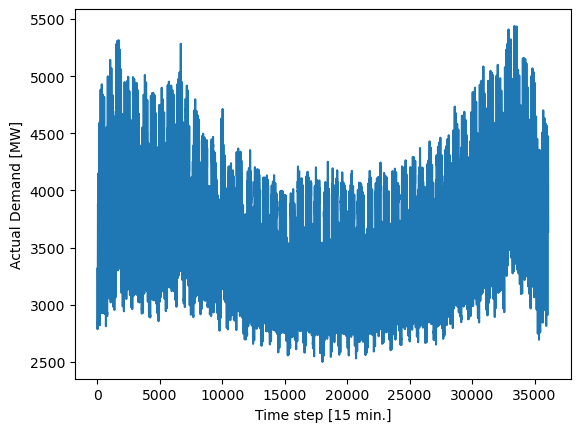

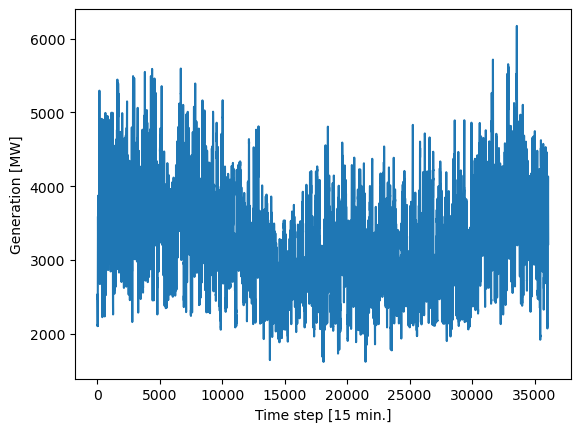

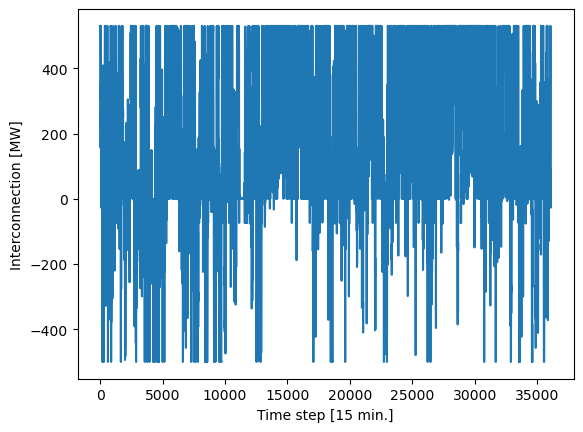

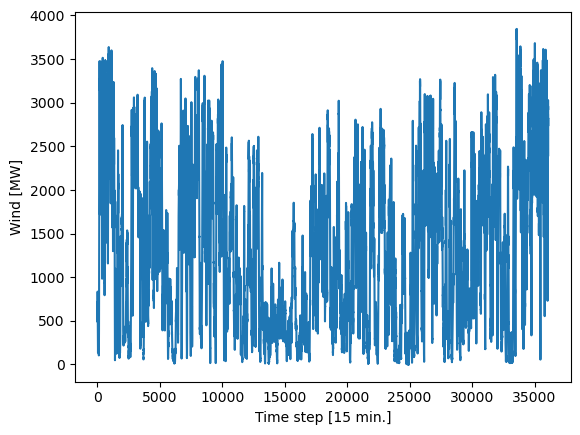

In [13]:
df_demand_23 = pd.read_csv('ROI_demandactual_23_Eirgrid.csv')
demand_23 = df_demand_23.iloc[:,3].values
plt.xlabel('Time step [15 min.]')
plt.ylabel('Actual Demand [MW]')
plt.plot(demand_23)
plt.show()

df_generation_23 = pd.read_csv('ROI_generationactual_23_Eirgrid.csv')
generation_23 = df_generation_23.iloc[:,3].values
plt.xlabel('Time step [15 min.]')
plt.ylabel('Generation [MW]')
plt.plot(generation_23)
plt.show()

df_interconnection_23 = pd.read_csv('ROI_interconnection_23_Eirgrid.csv')
interconnection_23 = df_interconnection_23.iloc[:,3].values
plt.xlabel('Time step [15 min.]')
plt.ylabel('Interconnection [MW]')
plt.plot(interconnection_23)
plt.show()

df_windactual_23 = pd.read_csv('ROI_windactual_23_Eirgrid.csv')
wind_23 = df_windactual_23.iloc[:,3].values
plt.xlabel('Time step [15 min.]')
plt.ylabel('Wind [MW]')
plt.plot(wind_23)
plt.show()

In [14]:
len_2023 = 36007  
year = '2023'

In [15]:
avg_wind_2023 = monthly_avg(len_2023, year, df_windactual_23)
print("Average wind energy [MWh]")
print(avg_wind_2023)

Average wind energy [MWh]
{'Jan': 397.77991596638657, 'Feb': 410.96278901734104, 'Mar': 366.31830065359475, 'Apr': 325.11556603773585, 'May': 184.2204634464752, 'Jun': 180.99612533692724, 'Jul': 291.15869778067884, 'Aug': 289.8731233681462, 'Sep': 282.6444575471698, 'Oct': 275.55344321148823, 'Nov': 387.82614555256066, 'Dec': 497.9791054521711}


In [16]:
avg_demand_2023 = monthly_avg(len_2023, year, df_demand_23)
print("Average demand [MWh]")
print(avg_demand_2023)

Average demand [MWh]
{'Jan': 990.797731092437, 'Feb': 974.4511380057803, 'Mar': 987.4202614379085, 'Apr': 916.8610175202157, 'May': 874.6728133159269, 'Jun': 860.0101078167116, 'Jul': 849.5321475195823, 'Aug': 861.5003263707572, 'Sep': 891.6244103773585, 'Oct': 922.1455613577024, 'Nov': 995.722371967655, 'Dec': 1004.4032810969637}


In [17]:
avg_generation_2023 = monthly_avg(len_2023, year, df_generation_23)
print("Average generation [MWh]")
print(avg_generation_2023)

Average generation [MWh]
{'Jan': 939.5475630252101, 'Feb': 937.5671965317919, 'Mar': 921.8346405228758, 'Apr': 845.2234669811321, 'May': 762.6976990861618, 'Jun': 753.9560309973045, 'Jul': 758.1174934725849, 'Aug': 769.2246246736293, 'Sep': 778.7563173854447, 'Oct': 769.4867819843342, 'Nov': 897.5715970350404, 'Dec': 932.4072804440092}


In [18]:
avg_interconnection_2023 = monthly_avg(len_2023, year, df_interconnection_23)
print("Average generation [MWh]")
print(avg_interconnection_2023)

Average generation [MWh]
{'Jan': 22.847899159663864, 'Feb': 12.175668352601155, 'Mar': 33.67017973856209, 'Apr': 27.80028638814016, 'May': 66.39727480417754, 'Jun': 65.57934636118598, 'Jul': 54.2056951697128, 'Aug': 55.159758485639685, 'Sep': 65.50176886792453, 'Oct': 89.49208550913838, 'Nov': 59.674528301886795, 'Dec': 31.044972249428664}


Text(0, 0.5, 'Energy [MWh]')

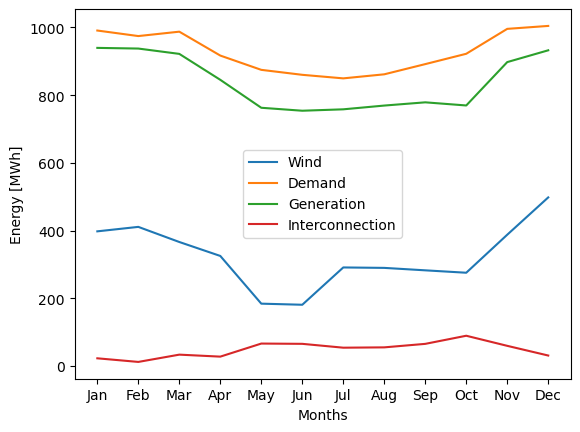

In [19]:
plt.plot(avg_wind_2023.keys(), avg_wind_2023.values())
plt.plot(avg_demand_2023.keys(), avg_demand_2023.values())
plt.plot(avg_generation_2023.keys(), avg_generation_2023.values())
plt.plot(avg_interconnection_2023.keys(), avg_interconnection_2023.values())
plt.legend(['Wind', 'Demand', 'Generation', 'Interconnection'])
plt.xlabel('Months')
plt.ylabel('Energy [MWh]')

Text(0, 0.5, 'Energy [MWh]')

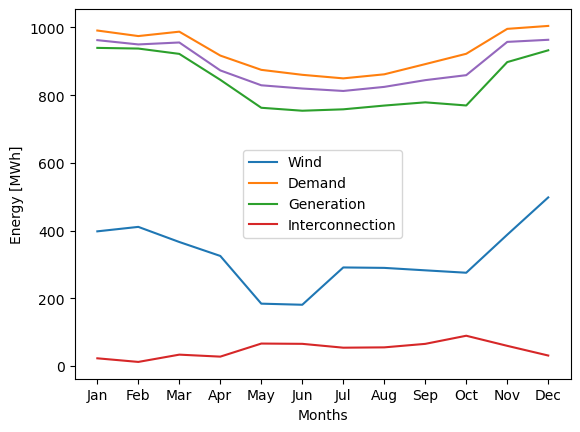

In [24]:
plt.plot(avg_wind_2023.keys(), avg_wind_2023.values())
plt.plot(avg_demand_2023.keys(), avg_demand_2023.values())
plt.plot(avg_generation_2023.keys(), avg_generation_2023.values())
plt.plot(avg_interconnection_2023.keys(), avg_interconnection_2023.values())
plt.plot(avg_wind_2023.keys(), (np.array(list(avg_generation_2023.values())) + np.array(list(avg_interconnection_2023.values()))))
plt.legend(['Wind', 'Demand', 'Generation', 'Interconnection'])
plt.xlabel('Months')
plt.ylabel('Energy [MWh]')